# Physiological data recording of interneurons from human temporal neocortex

In this notebook we will look more closely at the EBRAINS dataset "[Physiological data recording of interneurons from human temporal neocortex](https://search.kg.ebrains.eu/instances/d36336ac-1613-410c-99f6-ac9691545705)", contributed by Huibert D. Mansvelder  from the Center for Neurogenomics and Cognitive Research of the VU University Amsterdam in Amsterdam, Netherlands.

As we can see from the dataset description,

<i>This dataset includes electrophysiological recordings from interneurons in layer 1 or layer 2/3 from human temporal cortex. Electrophysiological cell properties are determined by current injections into the cell. These data can be used to classify the interneurons into subtypes.</i>
More information is available in the [Data Descriptor](https://search.kg.ebrains.eu/instances/d36336ac-1613-410c-99f6-ac9691545705).

This dataset forms part of the results reported in Kroon, T., Dawitz, J., Kramvis, I., Anink, J., Obermayer, J., Verhoog, M.B., Wilbers, R., Goriounova, N.A., Idema, S., Baayen, J.C., Aronica, E., Mansvelder, H.D., Meredith, R.M.(2019) Group I mGluR-Mediated Activation of Martinotti Cells Inhibits Local Cortical Circuitry in Human Cortex. *Front Cell Neurosci* **13**:315. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6637283/?report=reader

In this notebook we will demonstrate how to access the data files and the metadata from this study, and how these data can be analysed and visualised, with the goal of reproducing some of the figures from the article. 


### Notes: 
The whole publication is about when the DHPG was perfused but we have no idea when that happens for each individual cell

This is the info we have: 

The stimulus intensity was set to evoke a half-maximal current. Pulses were applied every 15 s and a baseline of at least 5 min was recorded after the eEPSC amplitude stabilized. After recording a stable baseline, 25 μM DHPG was perfused into the recording chamber for 5 min.

So it is possible to calculate when dhppg was applied and compare mebrane potential but only estimates

Furtheremore, 
here there is only information about the cells for the first 80 seconds 

No precise info as to when dhpg as applied so really hard to reuse data

In [3]:
#preparing the notebook
import neo
import matplotlib.pyplot as plt
from neo import get_io
from neo import io
import numpy as np
from statistics import mean
import statistics
import glob

In [4]:
#visualisation of the data, 
n=0
while n<20:
    plt.rcParams["figure.figsize"] = (7, 5)
    file_path = ("hbp-d000040_PyramidalCellProperties_pub/L2-3/2016_03_23_s3c2_0000.abf")
    reader = get_io(file_path)
    data = reader.read(lazy=True)
    reader = get_io(file_path)
    data = reader.read(lazy=True)
    seg0 = data[0].segments[(n)]
    channel0 = seg0.analogsignals[1]
    channel0 = channel0.load()
    channel0.array_annotations = {}
    plt.plot(channel0.times, channel0, label=f"segment #{n}")
    plt.xlabel(f"Time ({channel0.times.units.dimensionality.string})")
    plt.ylabel(f"Membrane potential ({channel0.units.dimensionality.string})")
    #plt.legend()
    plt.title("")
    n=n+1
plt.show() 

IndexError: list index out of range

/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'
/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'
/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'
/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all ch

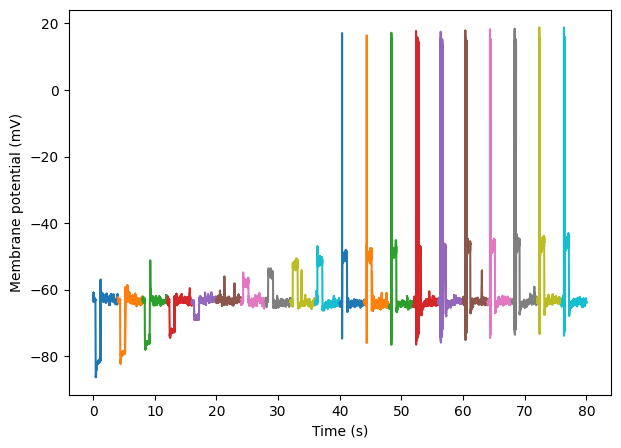

In [6]:
#visualisation of the data, 
n=0
while n<20:
    plt.rcParams["figure.figsize"] = (7, 5)
    file_path = ("hbp-d000040_PyramidalCellProperties_pub/L1/2015_07_08_s2c1_0002.abf")
    reader = get_io(file_path)
    data = reader.read(lazy=True)
    reader = get_io(file_path)
    data = reader.read(lazy=True)
    seg0 = data[0].segments[(n)]
    channel0 = seg0.analogsignals[0]
    channel0 = channel0.load()
    channel0.array_annotations = {}
    plt.plot(channel0.times, channel0, label=f"segment #{n}")
    plt.xlabel(f"Time ({channel0.times.units.dimensionality.string})")
    plt.ylabel(f"Membrane potential ({channel0.units.dimensionality.string})")
    #plt.legend()
    plt.title("")
    n=n+1
plt.show() 

/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'
/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'
/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'
/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all ch

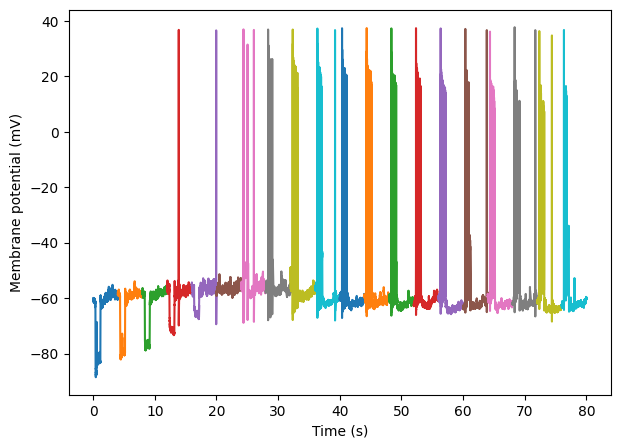

In [7]:
#visualisation of the data, 
n=0
while n<20:
    plt.rcParams["figure.figsize"] = (7, 5)
    file_path = ("hbp-d000040_PyramidalCellProperties_pub/L1/2015_07_15_s2c1_0002.abf")
    reader = get_io(file_path)
    data = reader.read(lazy=True)
    reader = get_io(file_path)
    data = reader.read(lazy=True)
    seg0 = data[0].segments[(n)]
    channel0 = seg0.analogsignals[0]
    channel0 = channel0.load()
    channel0.array_annotations = {}
    plt.plot(channel0.times, channel0, label=f"segment #{n}")
    plt.xlabel(f"Time ({channel0.times.units.dimensionality.string})")
    plt.ylabel(f"Membrane potential ({channel0.units.dimensionality.string})")
    #plt.legend()
    plt.title("")
    n=n+1
plt.show() 

/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'
/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'
/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'
/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all ch

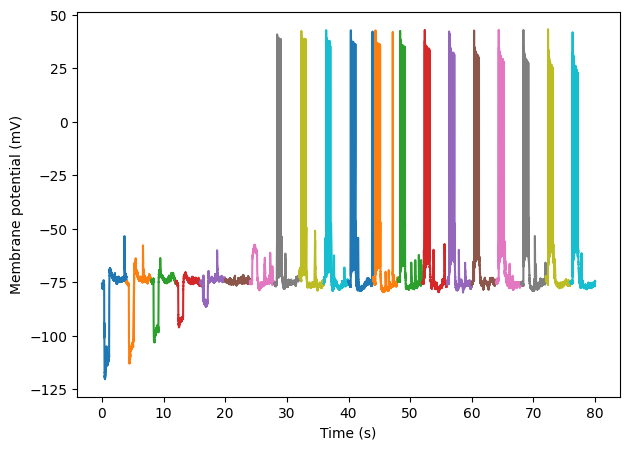

In [8]:
#visualisation of the data, 
n=0
while n<20:
    plt.rcParams["figure.figsize"] = (7, 5)
    file_path = ("hbp-d000040_PyramidalCellProperties_pub/L1/2015_11_04_s1c1_0001.abf")
    reader = get_io(file_path)
    data = reader.read(lazy=True)
    reader = get_io(file_path)
    data = reader.read(lazy=True)
    seg0 = data[0].segments[(n)]
    channel0 = seg0.analogsignals[0]
    channel0 = channel0.load()
    channel0.array_annotations = {}
    plt.plot(channel0.times, channel0, label=f"segment #{n}")
    plt.xlabel(f"Time ({channel0.times.units.dimensionality.string})")
    plt.ylabel(f"Membrane potential ({channel0.units.dimensionality.string})")
    #plt.legend()
    plt.title("")
    n=n+1
plt.show() 

/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'
/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'
/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'
/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all ch

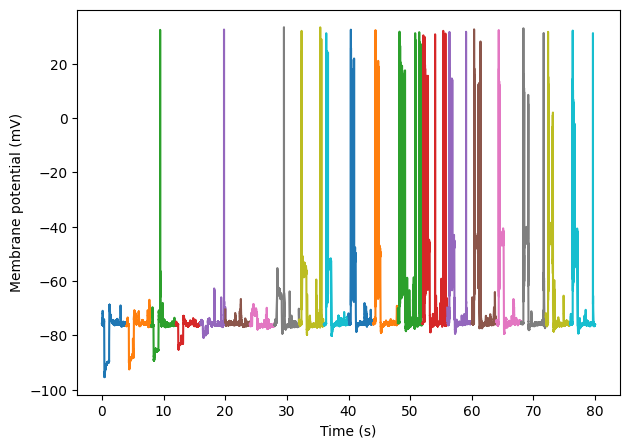

In [9]:
#visualisation of the data, 
n=0
while n<20:
    plt.rcParams["figure.figsize"] = (7, 5)
    file_path = ("hbp-d000040_PyramidalCellProperties_pub/L1/2015_11_04_s2c1_0001.abf")
    reader = get_io(file_path)
    data = reader.read(lazy=True)
    reader = get_io(file_path)
    data = reader.read(lazy=True)
    seg0 = data[0].segments[(n)]
    channel0 = seg0.analogsignals[0]
    channel0 = channel0.load()
    channel0.array_annotations = {}
    plt.plot(channel0.times, channel0, label=f"segment #{n}")
    plt.xlabel(f"Time ({channel0.times.units.dimensionality.string})")
    plt.ylabel(f"Membrane potential ({channel0.units.dimensionality.string})")
    #plt.legend()
    plt.title("")
    n=n+1
plt.show() 

/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'
/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'
/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'
/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all ch

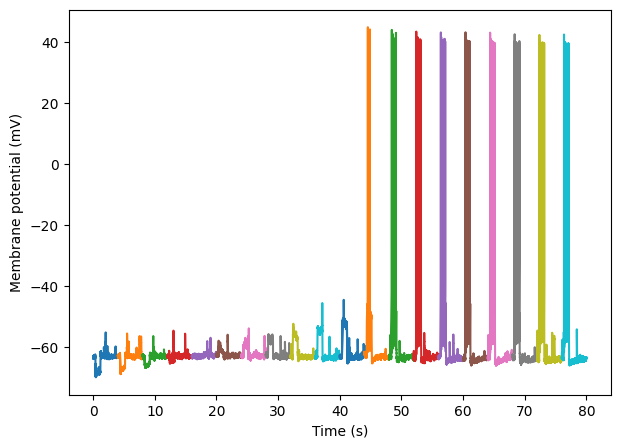

In [5]:
#visualisation of the data, 
n=0
while n<20:
    plt.rcParams["figure.figsize"] = (7, 5)
    file_path = ("hbp-d000040_PyramidalCellProperties_pub/L1/2015_06_24_s3_c1_0001.abf")
    reader = get_io(file_path)
    data = reader.read(lazy=True)
    reader = get_io(file_path)
    data = reader.read(lazy=True)
    seg0 = data[0].segments[(n)]
    channel0 = seg0.analogsignals[0]
    channel0 = channel0.load()
    channel0.array_annotations = {}
    plt.plot(channel0.times, channel0, label=f"segment #{n}")
    plt.xlabel(f"Time ({channel0.times.units.dimensionality.string})")
    plt.ylabel(f"Membrane potential ({channel0.units.dimensionality.string})")
    #plt.legend()
    plt.title("")
    n=n+1
plt.show() 

/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'
/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'
/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'
/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all ch

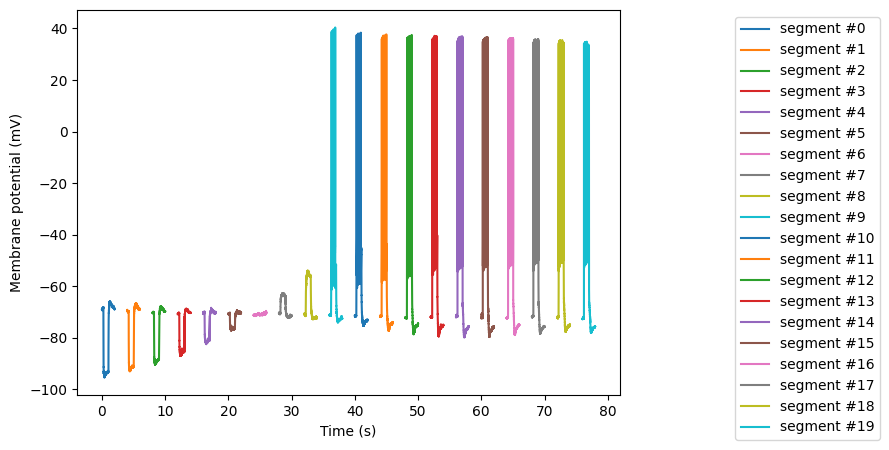

In [5]:
#visualisation of the data, 
n=0
while n<20:
    plt.rcParams["figure.figsize"] = (7, 5)
    file_path = ("hbp-d000040_PyramidalCellProperties_pub/L1/2017_01_25_s6c2_0000.abf")
    reader = get_io(file_path)
    data = reader.read(lazy=True)
    reader = get_io(file_path)
    data = reader.read(lazy=True)
    seg0 = data[0].segments[(n)]
    channel0 = seg0.analogsignals[0]
    channel0 = channel0.load()
    channel0.array_annotations = {}
    plt.plot(channel0.times, channel0, label=f"segment #{n}")
    plt.xlabel(f"Time ({channel0.times.units.dimensionality.string})")
    plt.ylabel(f"Membrane potential ({channel0.units.dimensionality.string})")
    plt.legend(bbox_to_anchor=(1.2, 1))
    plt.title("")
    
    n=n+1
plt.show()

/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'
/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'
/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'
/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all ch

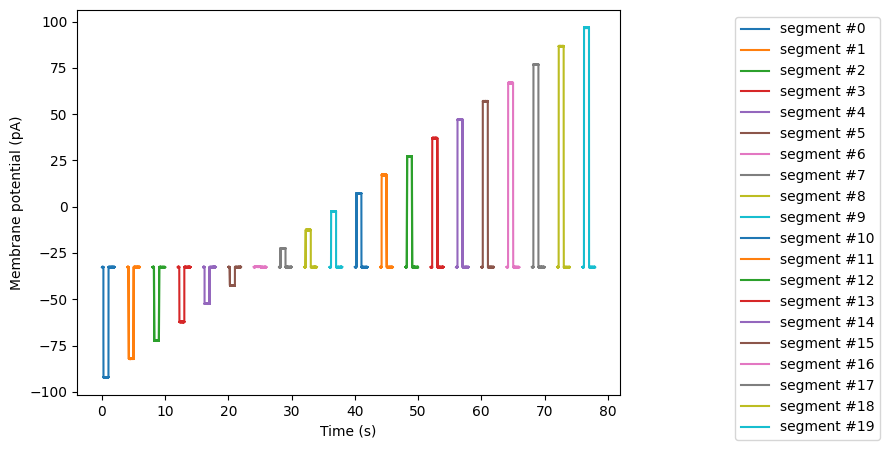

In [6]:
#visualisation of the data, 
n=0
while n<20:
    plt.rcParams["figure.figsize"] = (7, 5)
    file_path = ("hbp-d000040_PyramidalCellProperties_pub/L1/2017_01_25_s6c2_0000.abf")
    reader = get_io(file_path)
    data = reader.read(lazy=True)
    reader = get_io(file_path)
    data = reader.read(lazy=True)
    seg0 = data[0].segments[(n)]
    channel0 = seg0.analogsignals[1]
    channel0 = channel0.load()
    channel0.array_annotations = {}
    plt.plot(channel0.times, channel0, label=f"segment #{n}")
    plt.xlabel(f"Time ({channel0.times.units.dimensionality.string})")
    plt.ylabel(f"Membrane potential ({channel0.units.dimensionality.string})")
    plt.legend(bbox_to_anchor=(1.2, 1))
    plt.title("")
    
    n=n+1
plt.show()

In [24]:
reader = neo.io.ExampleIO('hbp-d000040_PyramidalCellProperties_pub/L1/2017_01_25_s6c2_0000.abf')
block = reader.read(lazy=False)[0]  # get the first block
segment = block.segments[1]         # get data from first (and only) segment
signals = segment.analogsignals[1]  # get first (multichannel) signal

print(reader)
print(block)
print(segment)
print(signals)

ExampleIO: /home/isaurebotherel/Bureau/hbp-d000040_PyramidalCellProperties_pub/L1/2017_01_25_s6c2_0000.abf
nb_block: 2
nb_segment:  [2, 3]
signal_streams: [stream 0 (chans: 8), stream 1 (chans: 8)]
signal_channels: [ch0, ch1, ch2, ch3 ... ch12 , ch13 , ch14 , ch15]
spike_channels: [unit0, unit1, unit2]
event_channels: [Some events, Some epochs]

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]] uV


In [49]:
for file_path in glob.glob ("hbp-d000040_PyramidalCellProperties_pub/L1/*.abf"): 
    n=0
    while n<20:
        plt.rcParams["figure.figsize"] = (7, 5)
        reader = get_io(file_path)
        data = reader.read(lazy=True)
        reader = get_io(file_path)
        data = reader.read(lazy=True)
        seg0 = data[0].segments[(n)]
        channel0 = seg0.analogsignals[1]
        channel0 = channel0.load()
        channel0.array_annotations = {}
        plt.plot(channel0.times, channel0, label=f"segment #{n}")
        plt.xlabel(f"Time ({channel0.times.units.dimensionality.string})")
        plt.ylabel(f"Membrane potential ({channel0.units.dimensionality.string})")
        plt.legend()
        plt.title("")
        plt.show()
    n=n+1

IndexError: list index out of range

I hold(pA) in xlsx file means the current that is inflicted to the membrane potential at rest 

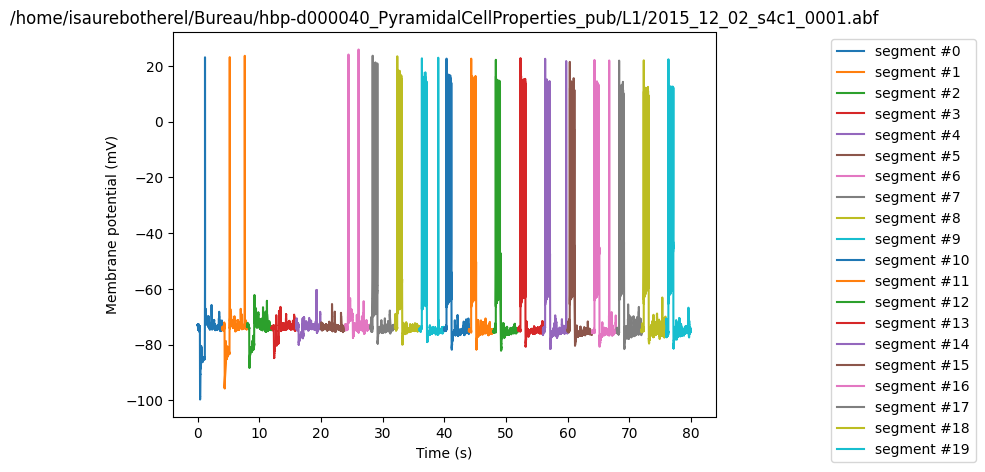

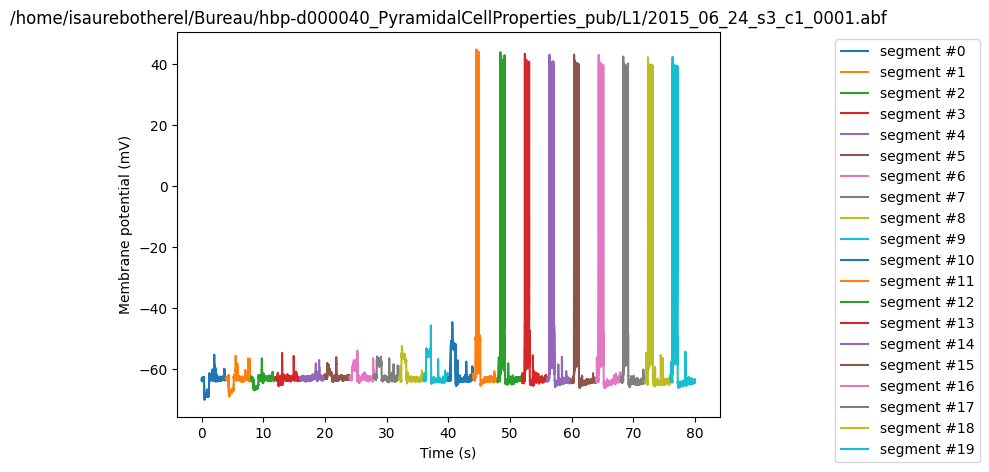

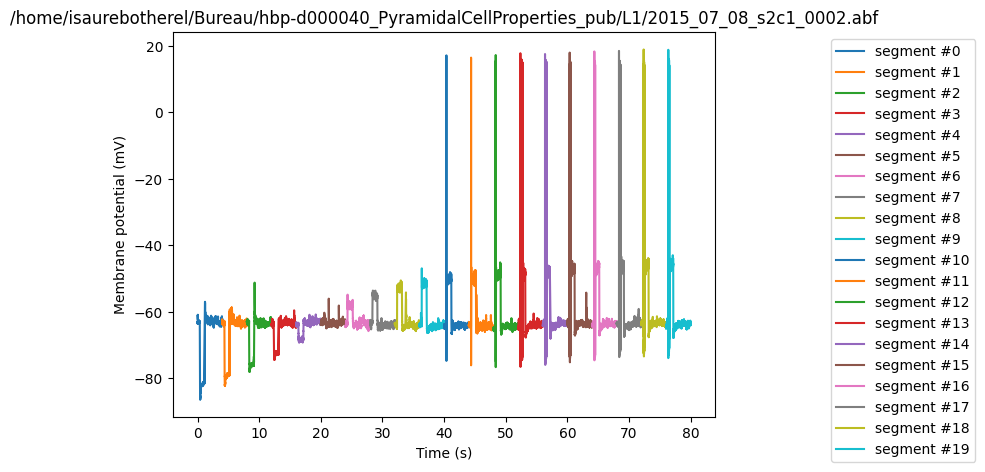

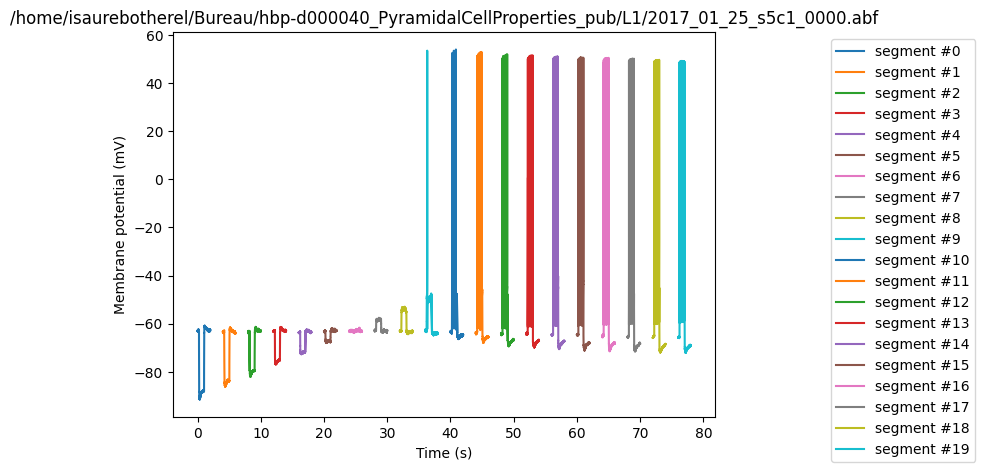

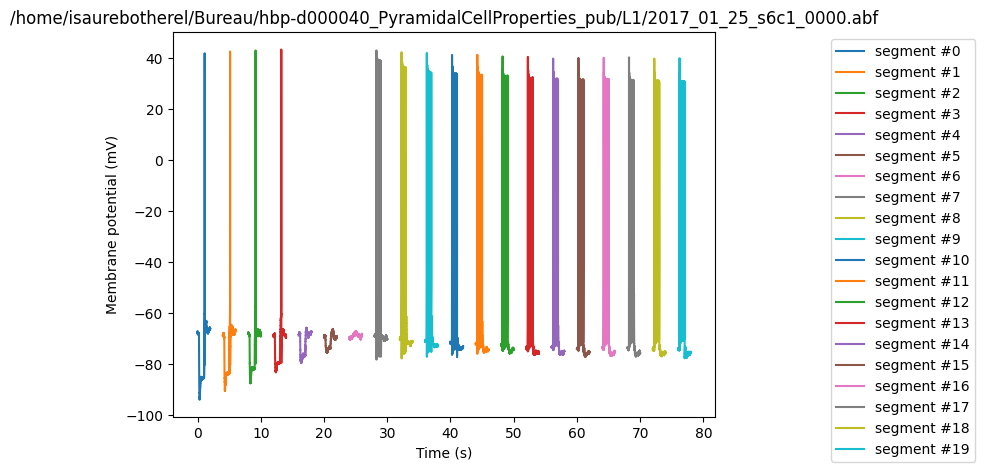

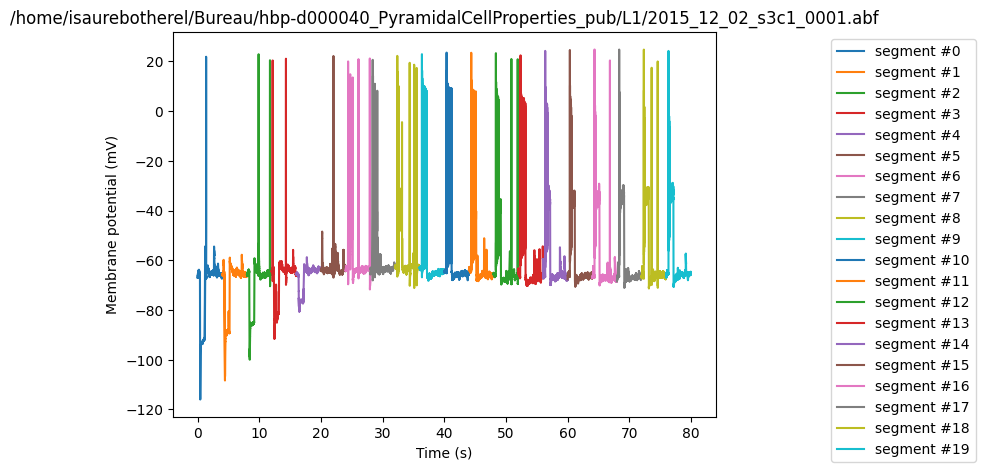

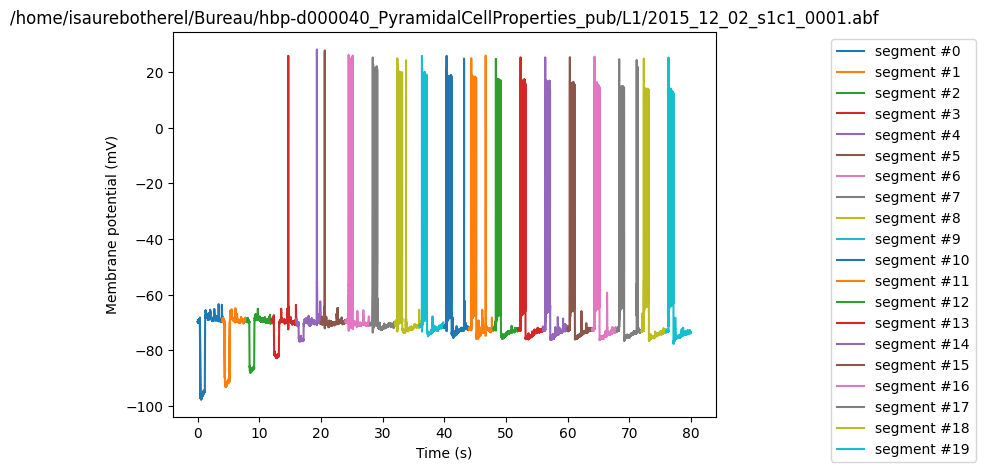

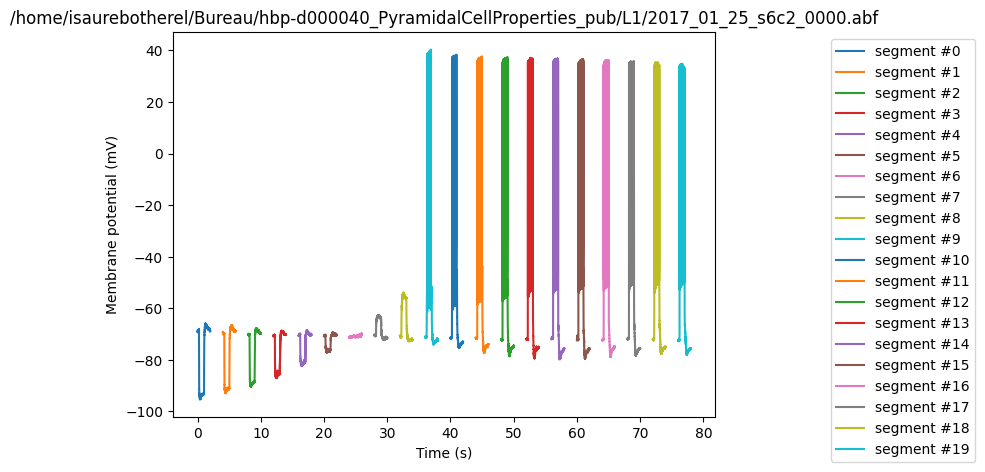

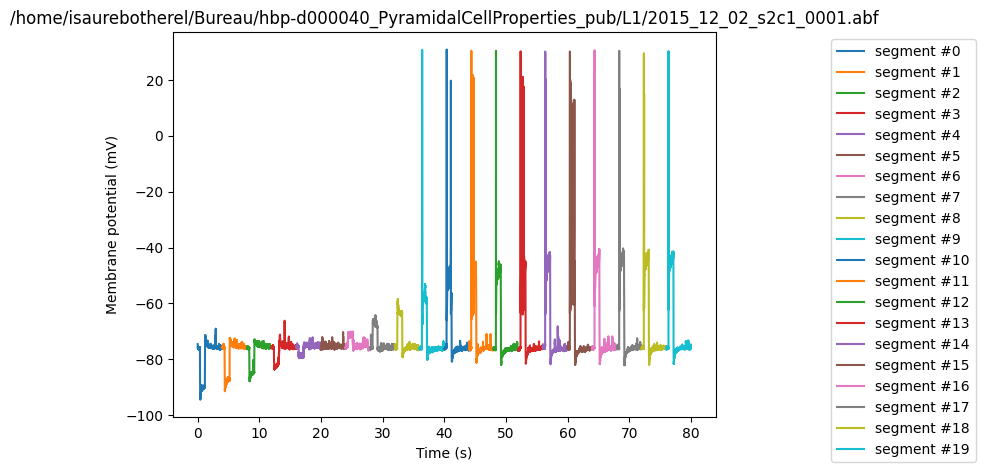

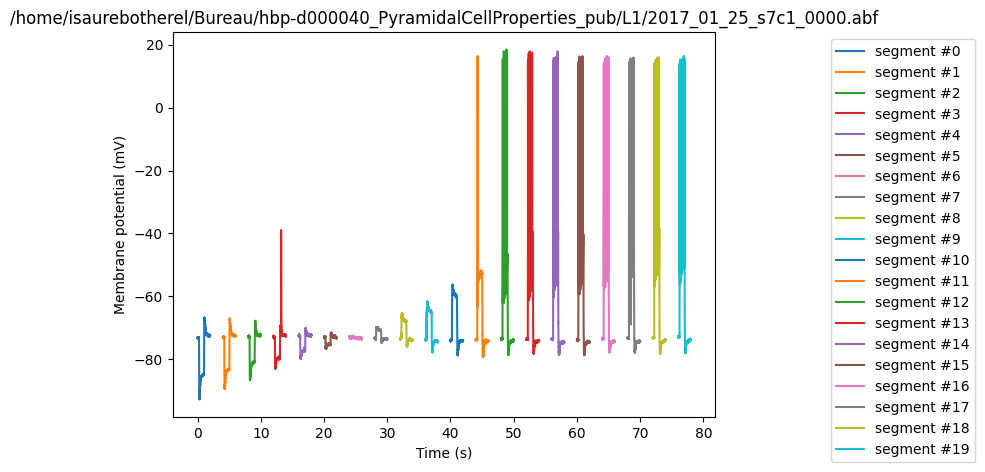

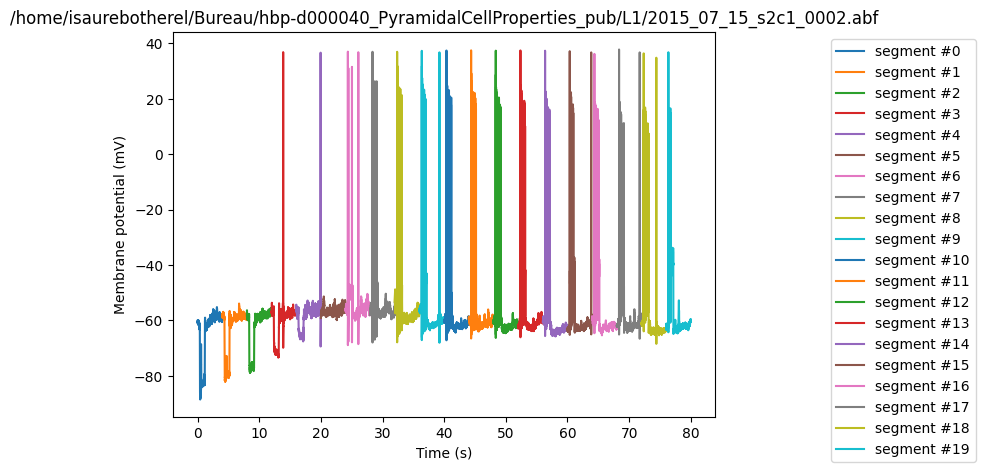

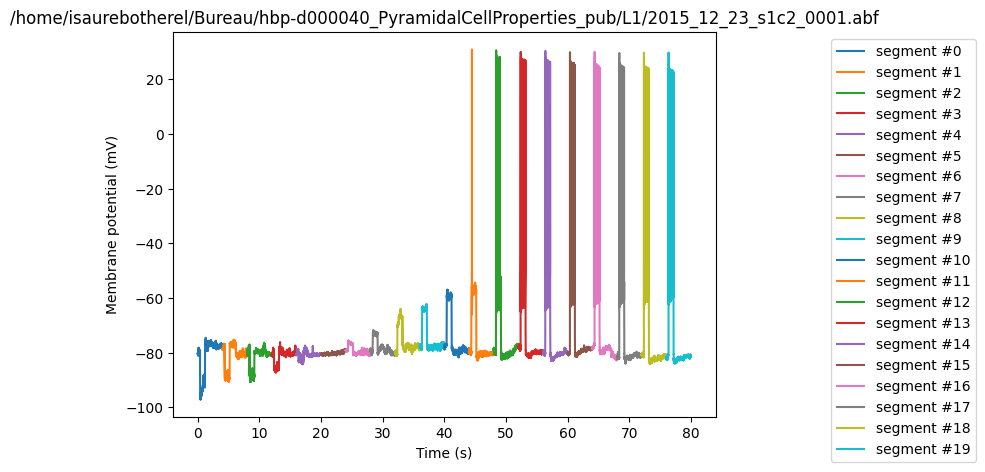

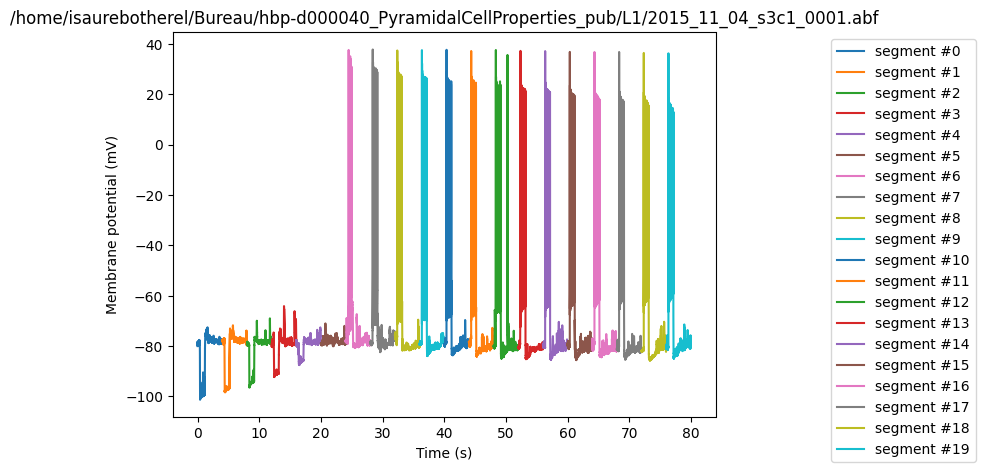

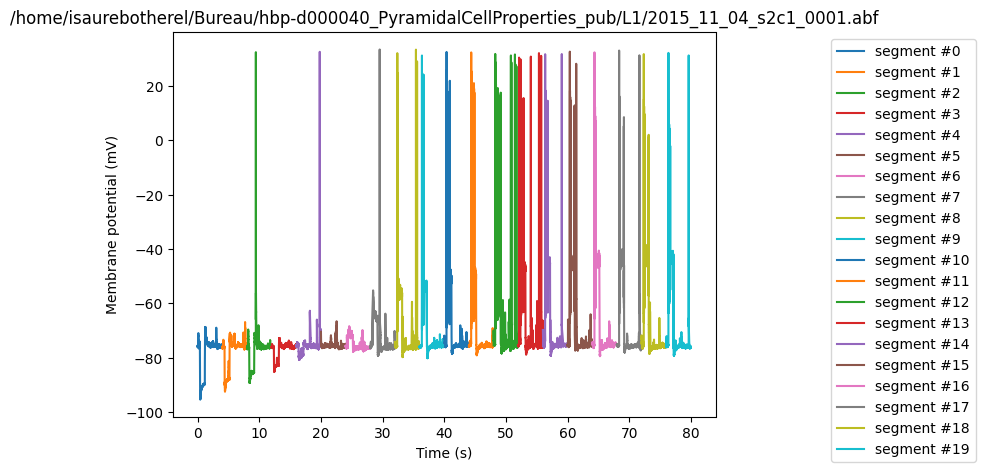

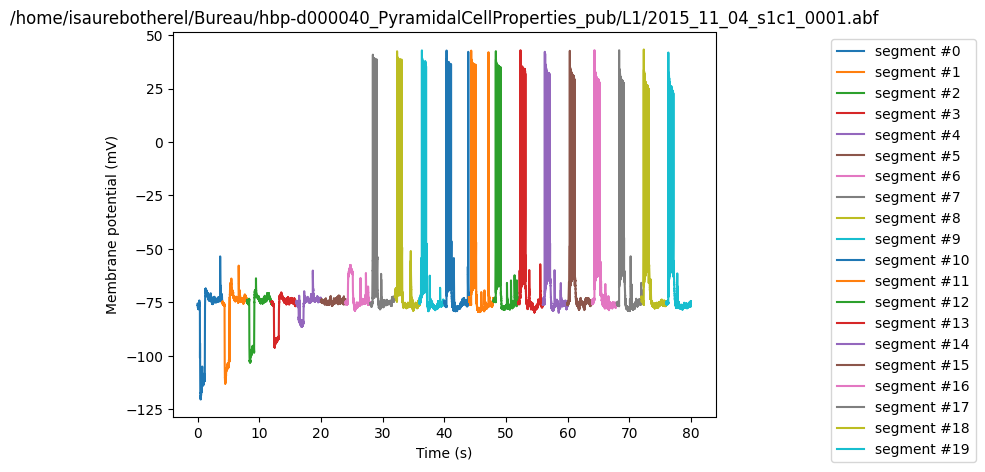

In [18]:
for file_path in glob.glob ("hbp-d000040_PyramidalCellProperties_pub/L1/*.abf"): 
    n=0
    while n<20:
        plt.rcParams["figure.figsize"] = (7, 5)
        reader = get_io(file_path)
        data = reader.read(lazy=True)
        reader = get_io(file_path)
        data = reader.read(lazy=True)
        seg0 = data[0].segments[(n)]
        channel0 = seg0.analogsignals[0]
        channel0 = channel0.load()
        channel0.array_annotations = {}
        plt.plot(channel0.times, channel0, label=f"segment #{n}")
        plt.xlabel(f"Time ({channel0.times.units.dimensionality.string})")
        plt.ylabel(f"Membrane potential ({channel0.units.dimensionality.string})")
        plt.legend(bbox_to_anchor=(1.2, 1))
        plt.title(file_path)
        n=n+1
    plt.show()

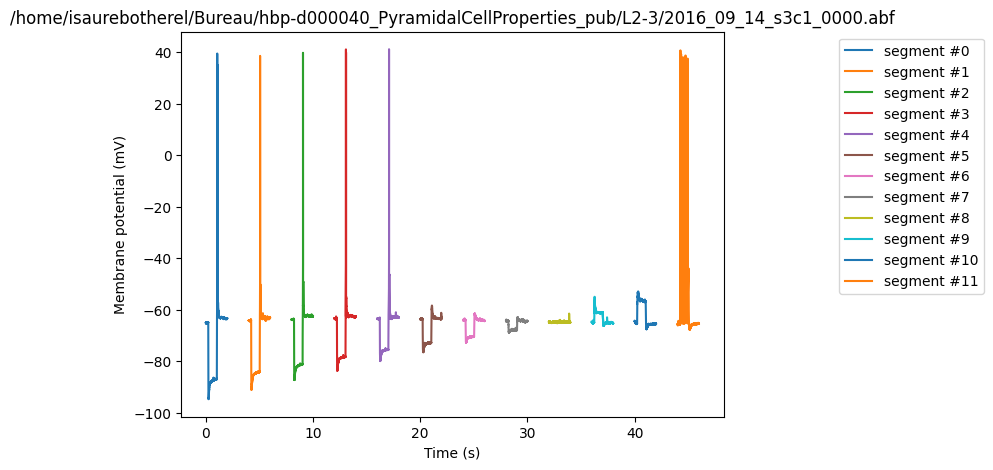

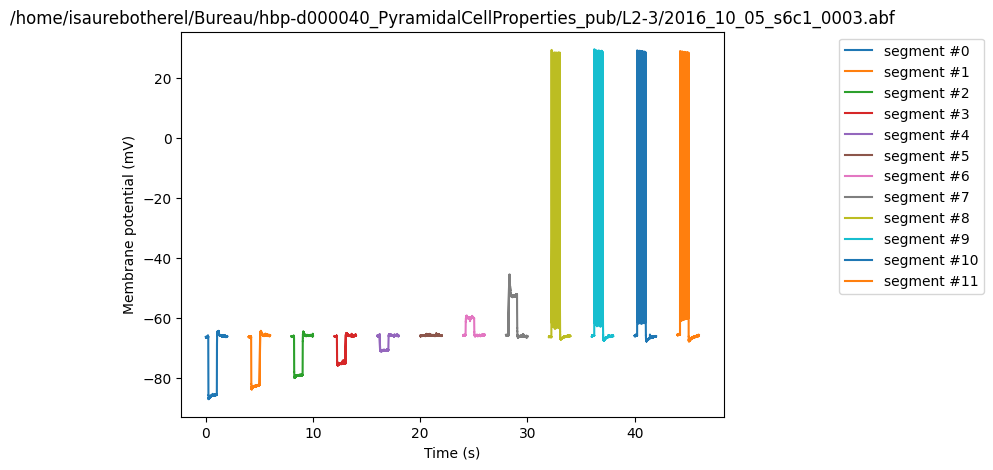

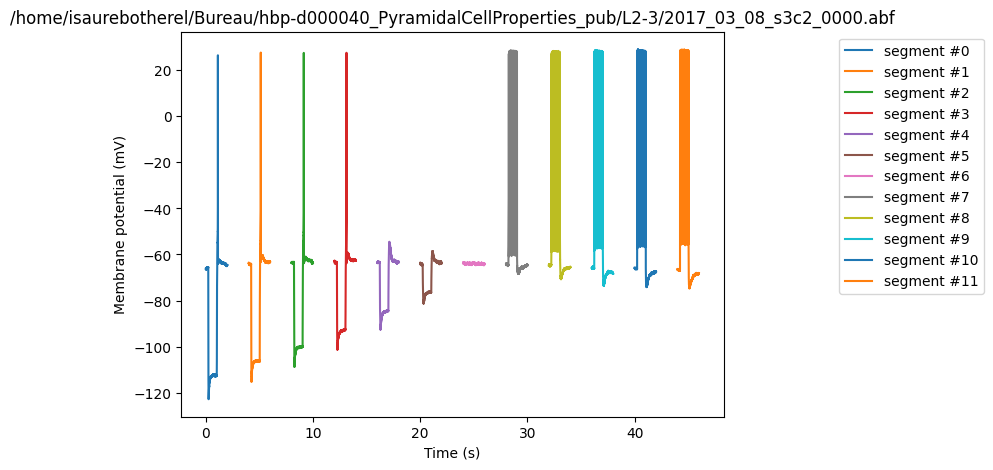

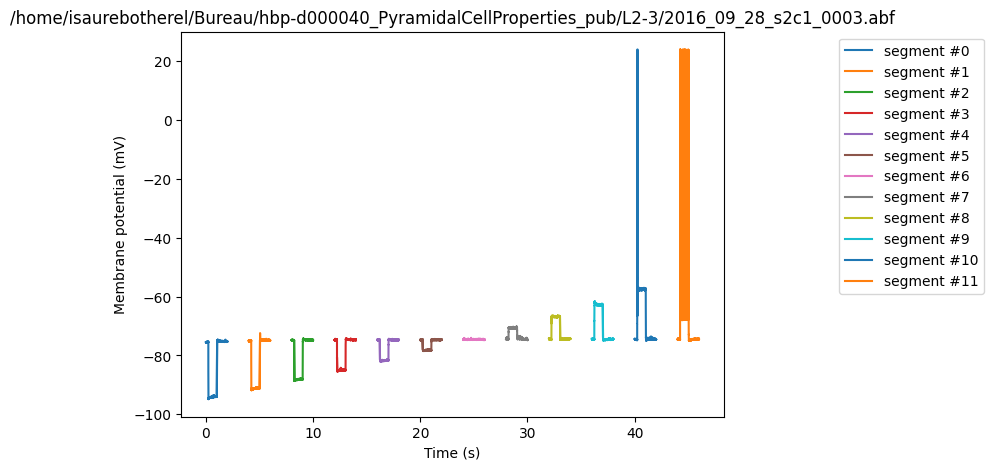

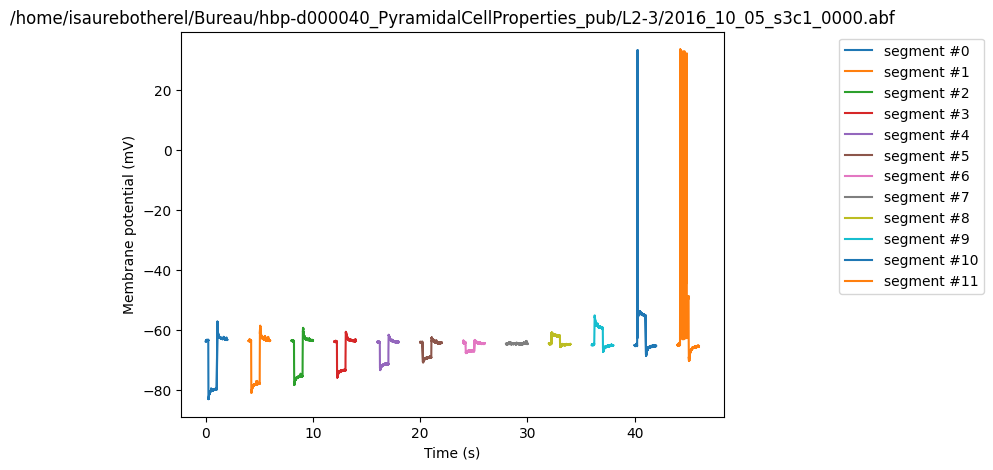

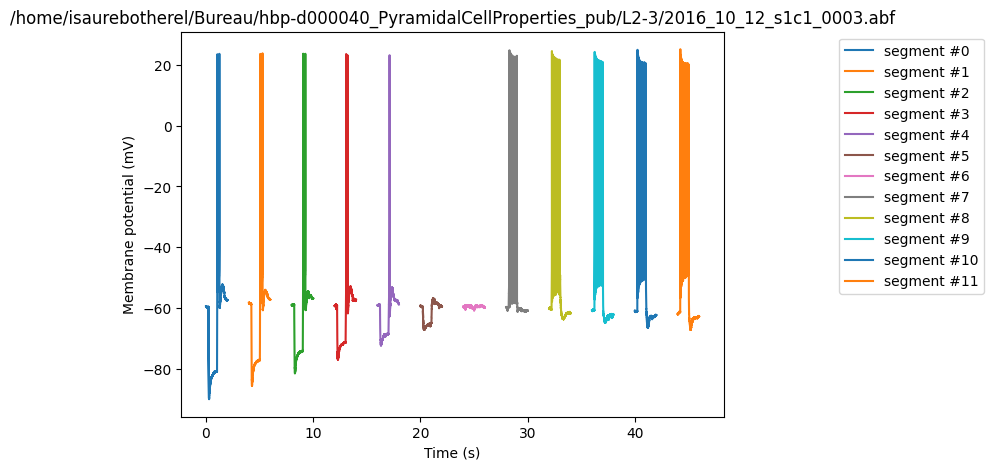

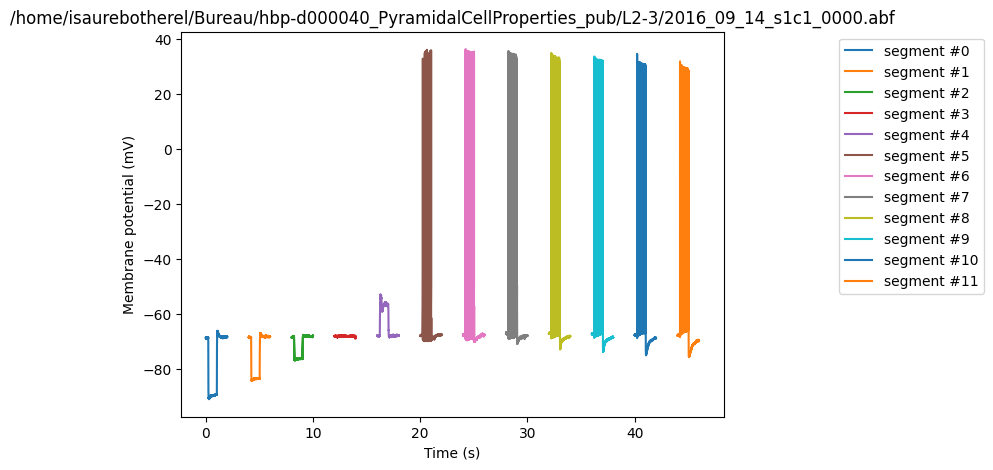

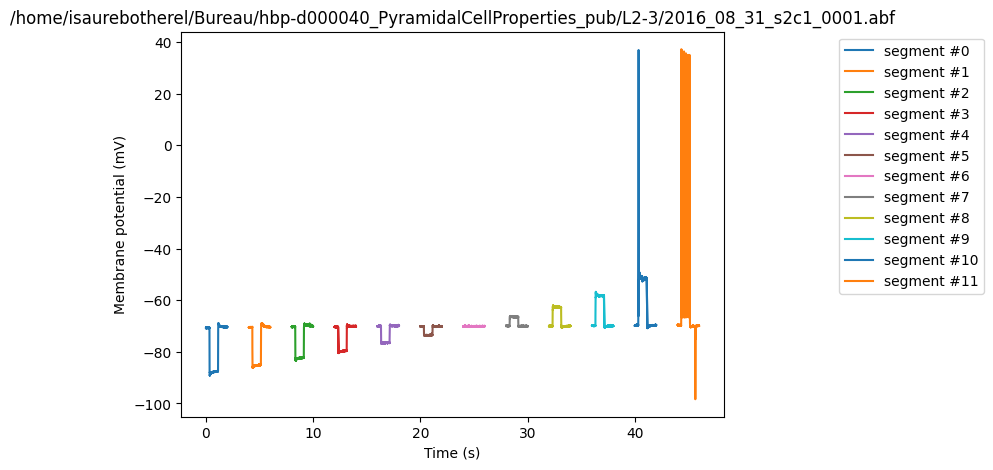

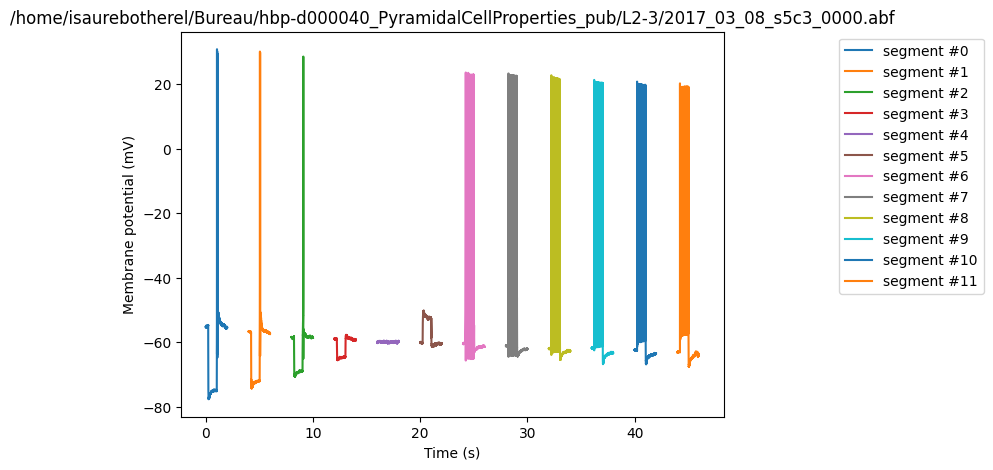

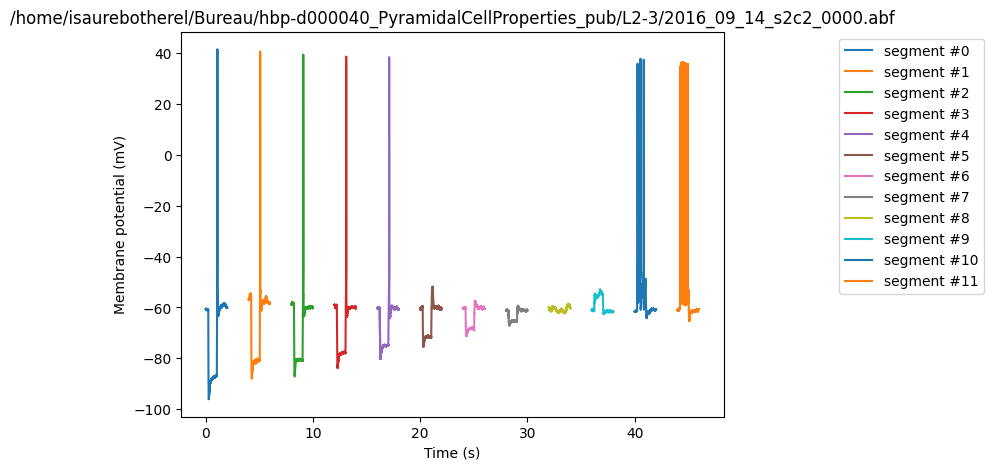

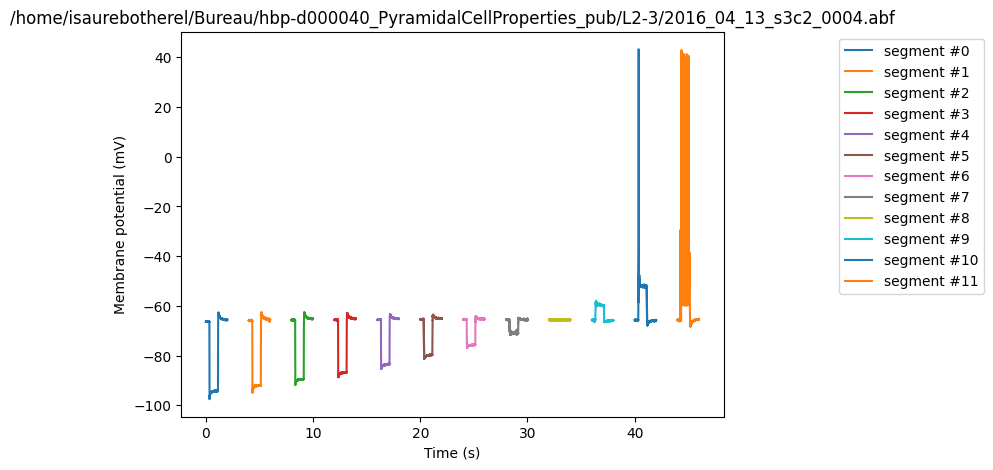

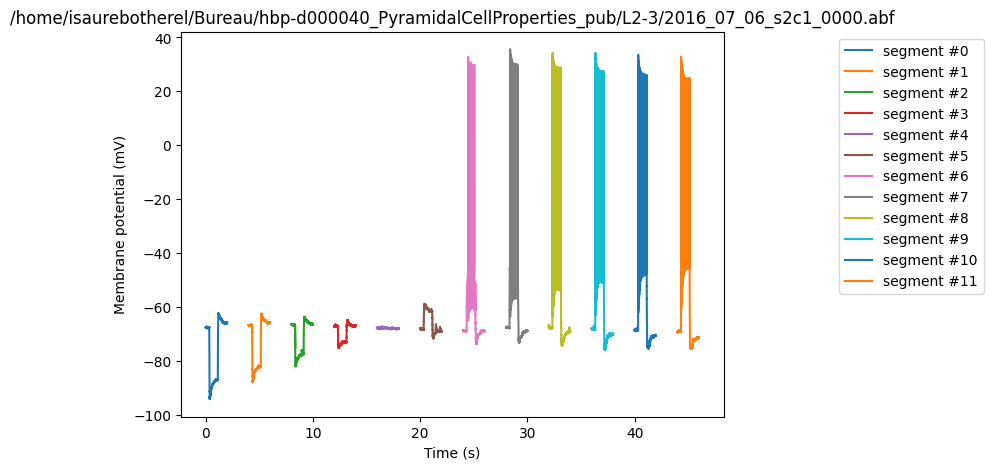

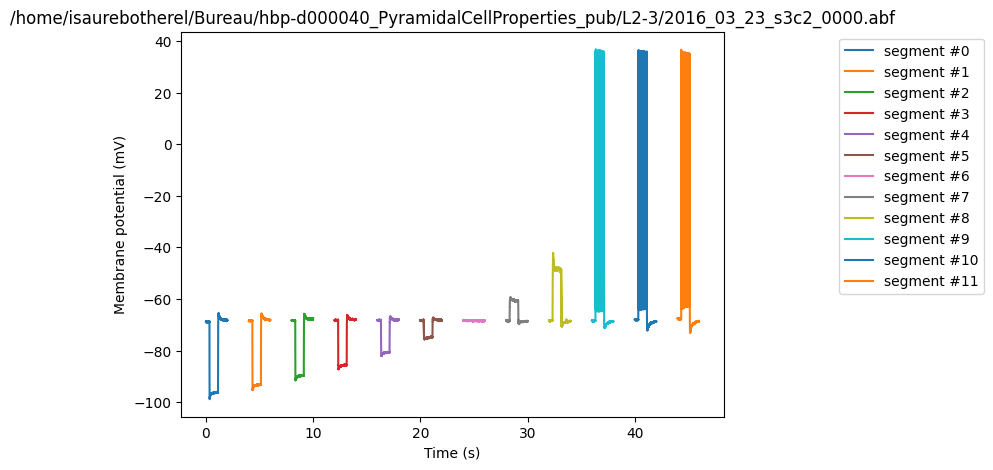

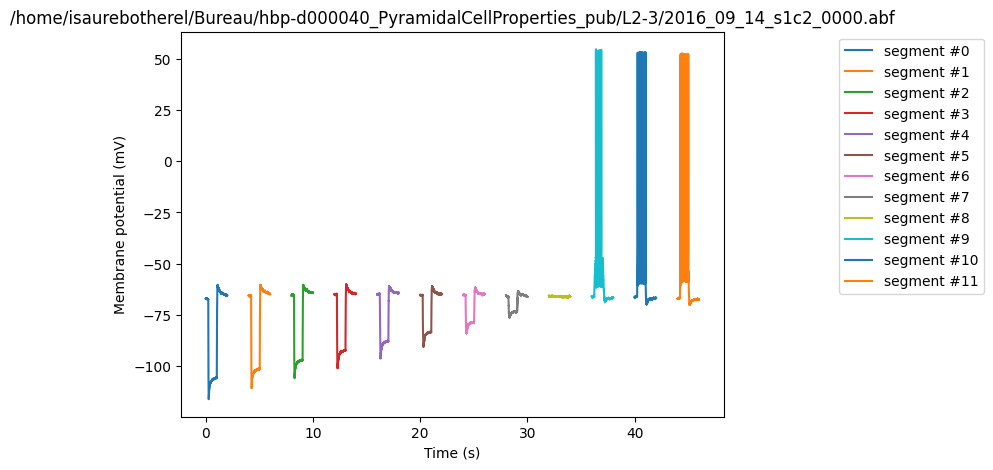

In [29]:
for file_path in glob.glob ("hbp-d000040_PyramidalCellProperties_pub/L2-3/*.abf"): 
    n=0
    while n<12:
        plt.rcParams["figure.figsize"] = (7, 5)
        reader = get_io(file_path)
        data = reader.read(lazy=True)
        reader = get_io(file_path)
        data = reader.read(lazy=True)
        seg0 = data[0].segments[(n)]
        channel0 = seg0.analogsignals[0]
        channel0 = channel0.load()
        channel0.array_annotations = {}
        plt.plot(channel0.times, channel0, label=f"segment #{n}")
        plt.xlabel(f"Time ({channel0.times.units.dimensionality.string})")
        plt.ylabel(f"Membrane potential ({channel0.units.dimensionality.string})")
        plt.legend(bbox_to_anchor=(1.2, 1))
        plt.title(file_path)
        n=n+1
    plt.show()

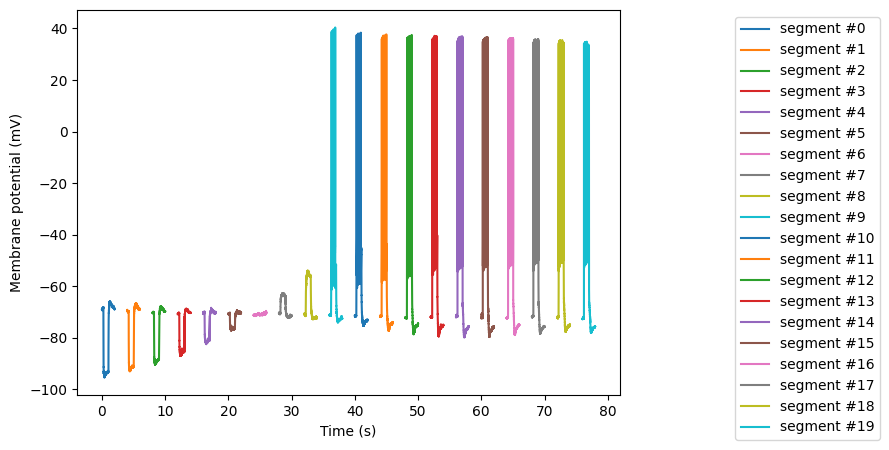

In [17]:
#visualisation of the data, 
n=0
while n<20:
    plt.rcParams["figure.figsize"] = (7, 5)
    file_path = ("hbp-d000040_PyramidalCellProperties_pub/L1/2017_01_25_s6c2_0000.abf")
    reader = get_io(file_path)
    data = reader.read(lazy=True)
    reader = get_io(file_path)
    data = reader.read(lazy=True)
    seg0 = data[0].segments[(n)]
    channel0 = seg0.analogsignals[0]
    channel0 = channel0.load()
    channel0.array_annotations = {}
    plt.plot(channel0.times, channel0, label=f"segment #{n}")
    plt.xlabel(f"Time ({channel0.times.units.dimensionality.string})")
    plt.ylabel(f"Membrane potential ({channel0.units.dimensionality.string})")
    plt.legend(bbox_to_anchor=(1.2, 1))
    plt.title("")
    plt.show()
    n=n+1


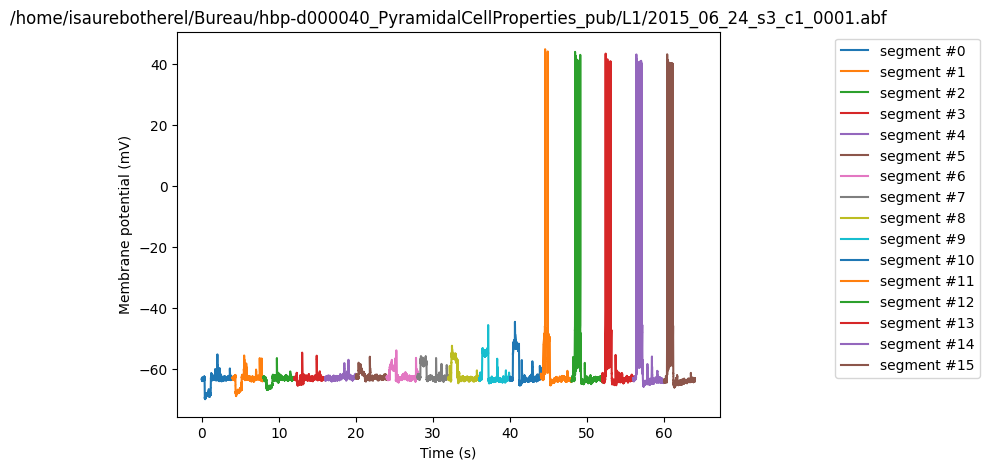

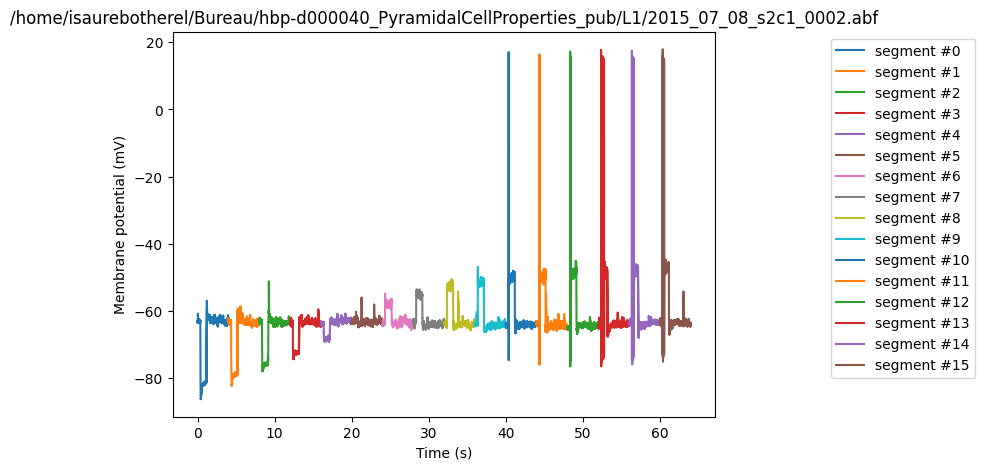

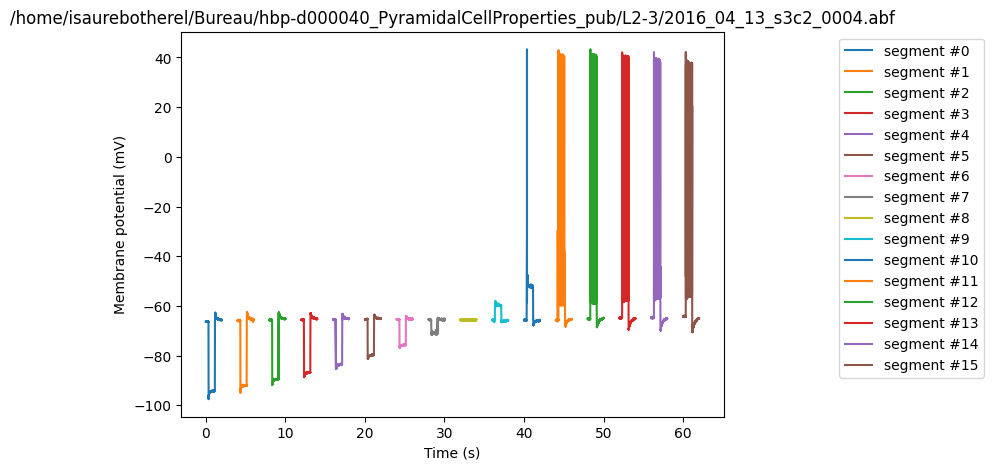

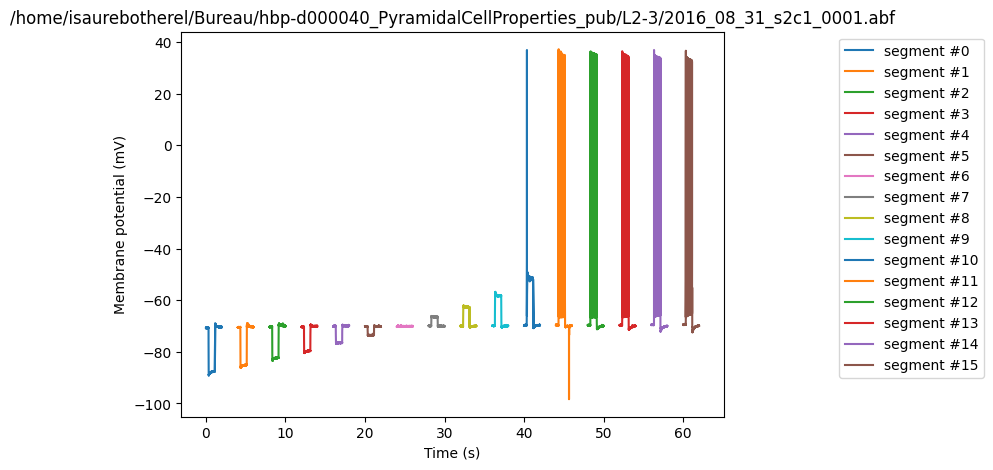

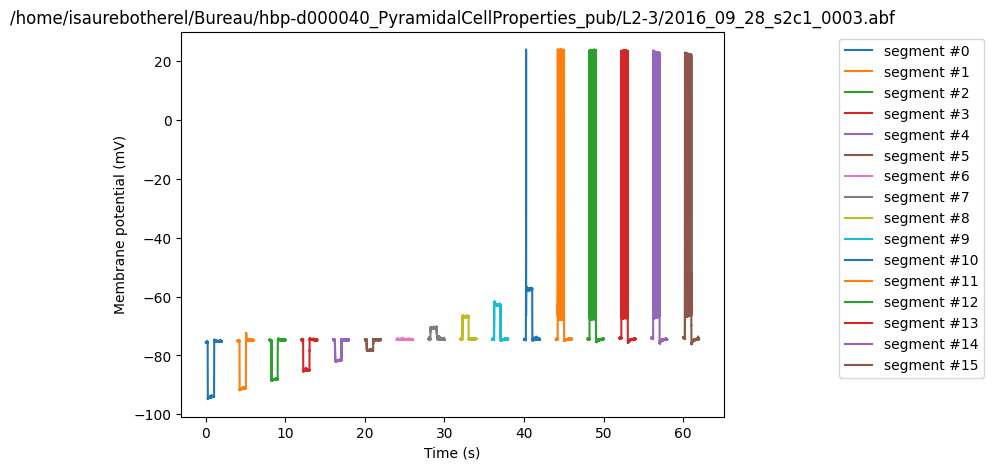

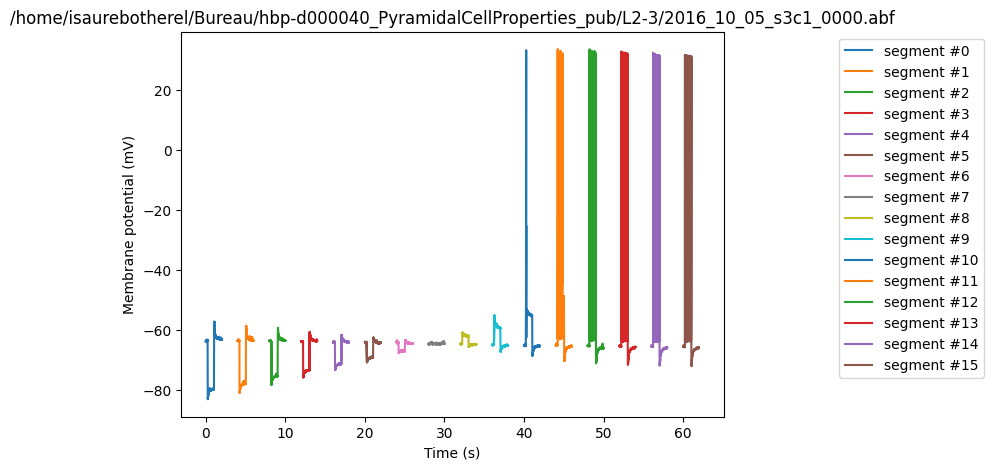

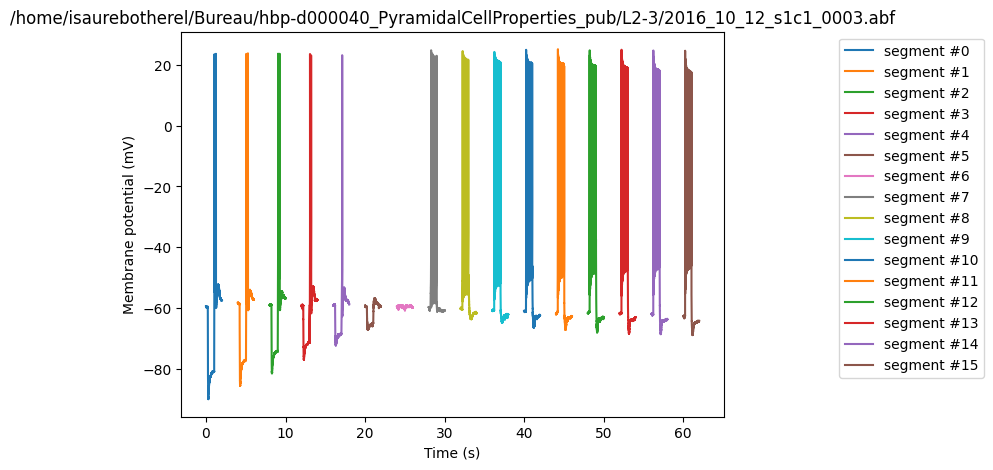

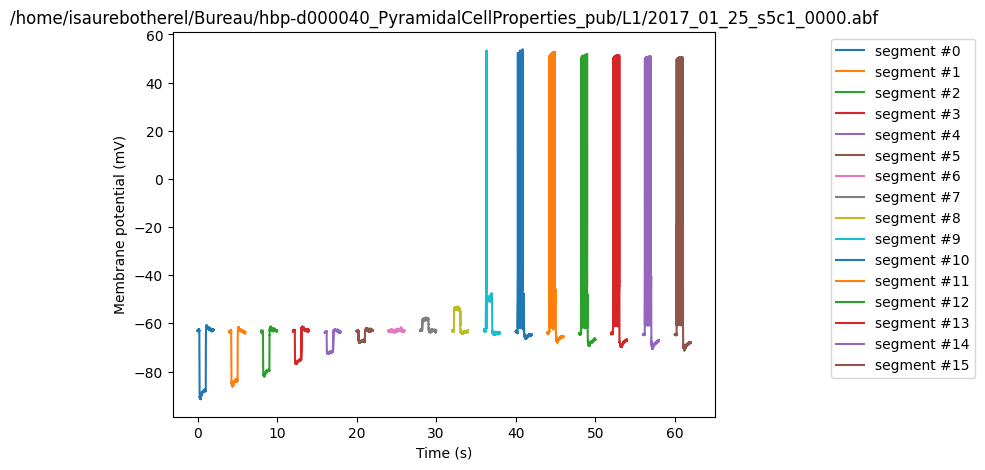

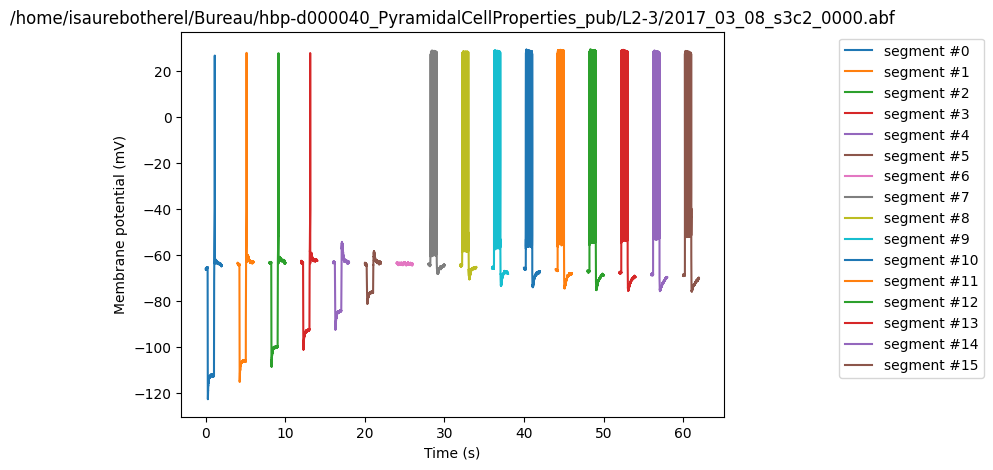

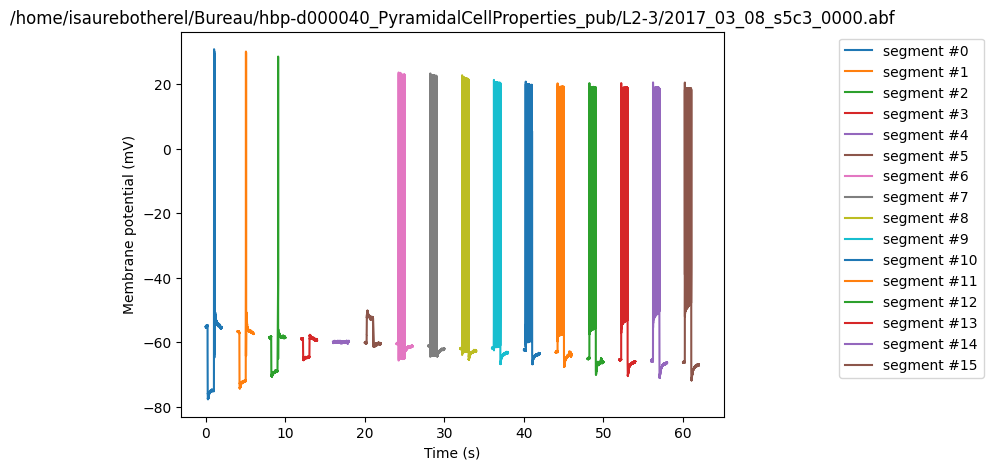

In [47]:
pA0=[ "hbp-d000040_PyramidalCellProperties_pub/L1/2015_06_24_s3_c1_0001.abf",
      "hbp-d000040_PyramidalCellProperties_pub/L1/2015_07_08_s2c1_0002.abf",
      "hbp-d000040_PyramidalCellProperties_pub/L2-3/2016_04_13_s3c2_0004.abf",
      "hbp-d000040_PyramidalCellProperties_pub/L2-3/2016_08_31_s2c1_0001.abf",
      "hbp-d000040_PyramidalCellProperties_pub/L2-3/2016_09_28_s2c1_0003.abf",
      "hbp-d000040_PyramidalCellProperties_pub/L2-3/2016_10_05_s3c1_0000.abf",
      "hbp-d000040_PyramidalCellProperties_pub/L2-3/2016_10_12_s1c1_0003.abf",
      "hbp-d000040_PyramidalCellProperties_pub/L1/2017_01_25_s5c1_0000.abf",
      "hbp-d000040_PyramidalCellProperties_pub/L2-3/2017_03_08_s3c2_0000.abf",
      "hbp-d000040_PyramidalCellProperties_pub/L2-3/2017_03_08_s5c3_0000.abf"]
for file_path in pA0: 
    n=0
    while n<16:
        plt.rcParams["figure.figsize"] = (7, 5)
        reader = get_io(file_path)
        data = reader.read(lazy=True)
        reader = get_io(file_path)
        data = reader.read(lazy=True)
        seg0 = data[0].segments[(n)]
        channel0 = seg0.analogsignals[0]
        channel0 = channel0.load()
        channel0.array_annotations = {}
        plt.plot(channel0.times, channel0, label=f"segment #{n}")
        plt.xlabel(f"Time ({channel0.times.units.dimensionality.string})")
        plt.ylabel(f"Membrane potential ({channel0.units.dimensionality.string})")
        plt.legend(bbox_to_anchor=(1.2, 1))
        plt.title(file_path)
        n=n+1
    plt.show()

### Figure 1a

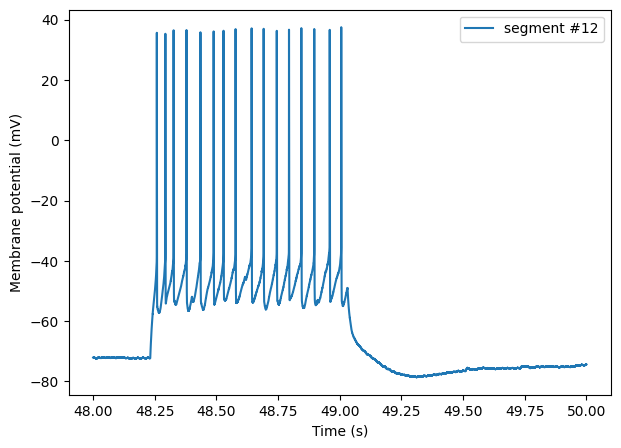

In [12]:

n=12
while n<13:
    plt.rcParams["figure.figsize"] = (7, 5)
    file_path = ("hbp-d000040_PyramidalCellProperties_pub/L1/2017_01_25_s6c2_0000.abf")
    reader = get_io(file_path)
    data = reader.read(lazy=True)
    reader = get_io(file_path)
    data = reader.read(lazy=True)
    seg0 = data[0].segments[(n)]
    channel0 = seg0.analogsignals[0]
    channel0 = channel0.load()
    channel0.array_annotations = {}
    plt.plot(channel0.times, channel0, label=f"segment #{n}")
    plt.xlabel(f"Time ({channel0.times.units.dimensionality.string})")
    plt.ylabel(f"Membrane potential ({channel0.units.dimensionality.string})")
    plt.legend()
    plt.title("")
    plt.show()
    n=n+1

In [58]:
print(file_path)

/home/isaurebotherel/Bureau/hbp-d000040_PyramidalCellProperties_pub/L1/2017_01_25_s5c1_0000.abf


In [18]:
for file_path in glob.glob ("hbp-d000040_PyramidalCellProperties_pub/L2-3/*.abf"):
    data[file_path] = get_io(file_path).read(lazy=True)[0]
    for i, segment in enumerate(data[file_path].segments):
        
        if i >=12 and i <=13:
            reader = get_io(file_path)
            data = reader.read(lazy=True)
            reader = get_io(file_path)
            data = reader.read(lazy=True)
            seg0 = data[0].segments[(n)]
            channel0 = seg0.analogsignals[0]
            channel0 = channel0.load()
            channel0.array_annotations = {}
            plt.plot(channel0.times, channel0, label=f"segment #{n}")
        plt.xlabel(f"Time ({channel0.times.units.dimensionality.string})")
        plt.ylabel(f"Membrane potential ({channel0.units.dimensionality.string})")
        plt.legend()
        plt.title("")
        plt.show()


TypeError: list indices must be integers or slices, not str

In [6]:
#presentation of the data

reader = neo.io.ExampleIO("hbp-d000040_PyramidalCellProperties_pub/L2-3/2017_03_08_s3c2_0000.abf")
block = reader.read(lazy=False)[0]  # get the first block
segment = block.segments[1]         # get data from first (and only) segment
signals = segment.analogsignals[1]  # get first (multichannel) signal

print(reader)
print(block)
print(segment)
print(signals)

ExampleIO: /home/isaurebotherel/Bureau/hbp-d000040_PyramidalCellProperties_pub/L2-3/2017_03_08_s3c2_0000.abf
nb_block: 2
nb_segment:  [2, 3]
signal_streams: [stream 0 (chans: 8), stream 1 (chans: 8)]
signal_channels: [ch0, ch1, ch2, ch3 ... ch12 , ch13 , ch14 , ch15]
spike_channels: [unit0, unit1, unit2]
event_channels: [Some events, Some epochs]

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]] uV


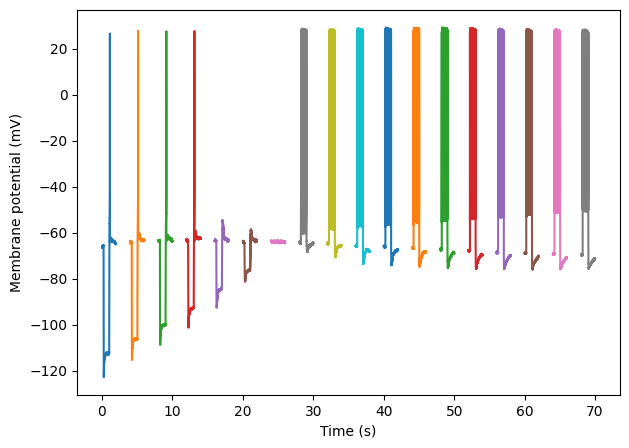

In [60]:
#visualisation of the data, 
n=0
while n<18:
    plt.rcParams["figure.figsize"] = (7, 5)
    file_path = ("hbp-d000040_PyramidalCellProperties_pub/L2-3/2017_03_08_s3c2_0000.abf")
    reader = get_io(file_path)
    data = reader.read(lazy=True)
    reader = get_io(file_path)
    data = reader.read(lazy=True)
    seg0 = data[0].segments[(n)]
    channel0 = seg0.analogsignals[0]
    channel0 = channel0.load()
    channel0.array_annotations = {}
    plt.plot(channel0.times, channel0, label=f"segment #{n}")
    plt.xlabel(f"Time ({channel0.times.units.dimensionality.string})")
    plt.ylabel(f"Membrane potential ({channel0.units.dimensionality.string})")
    #plt.legend()
    plt.title("")
    n=n+1
plt.show()

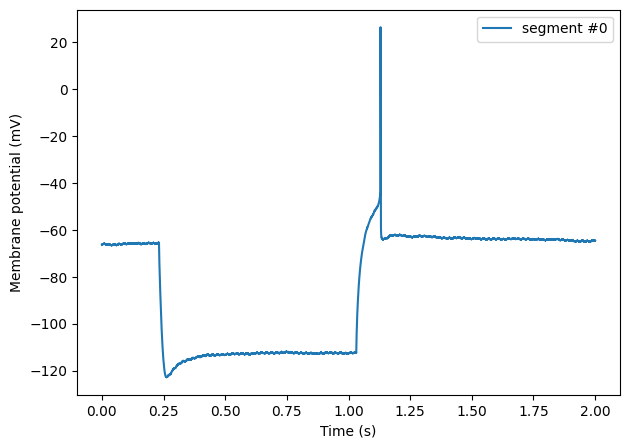

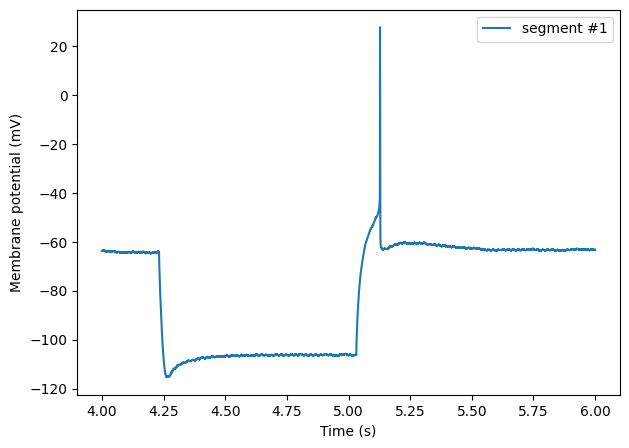

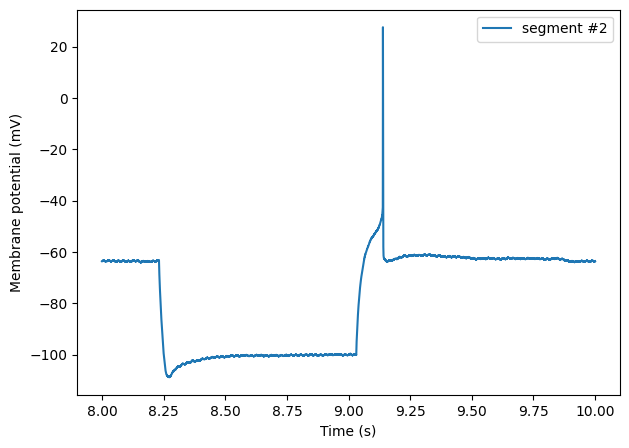

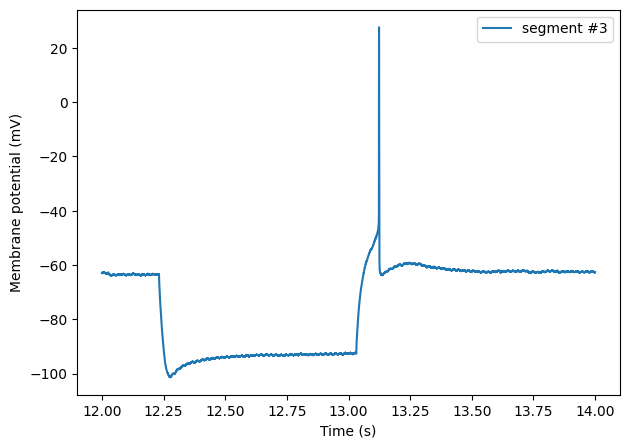

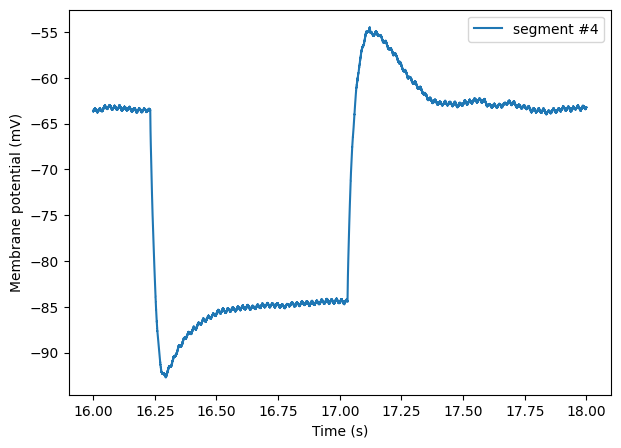

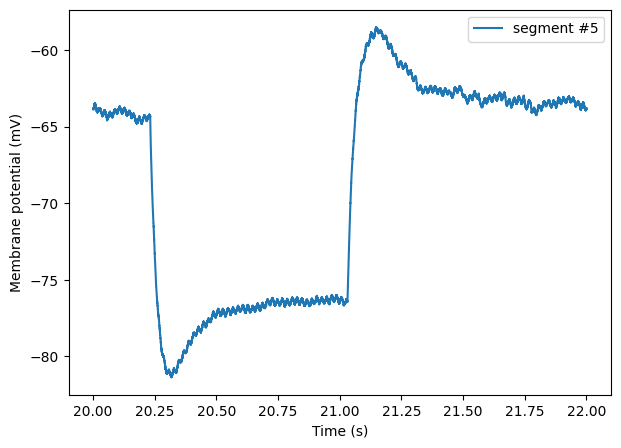

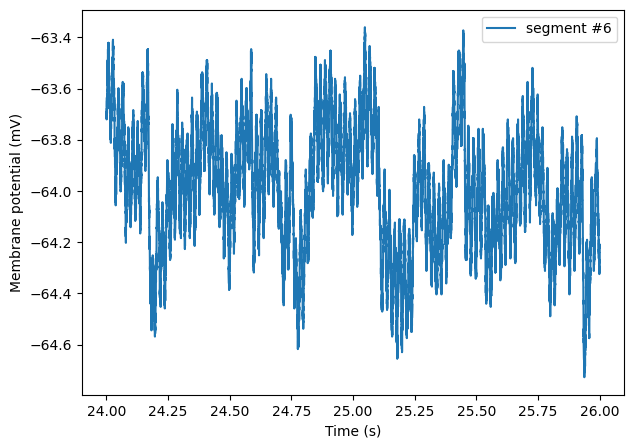

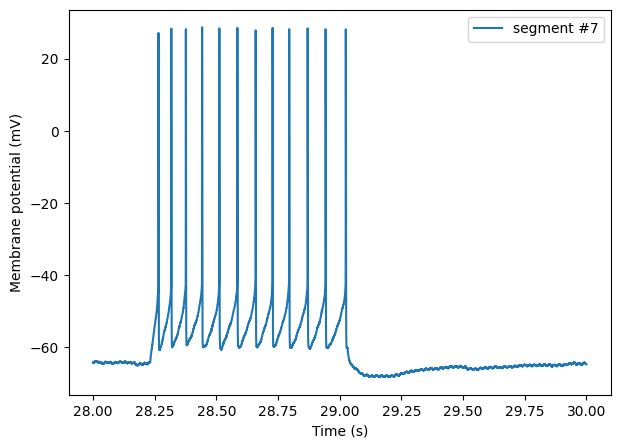

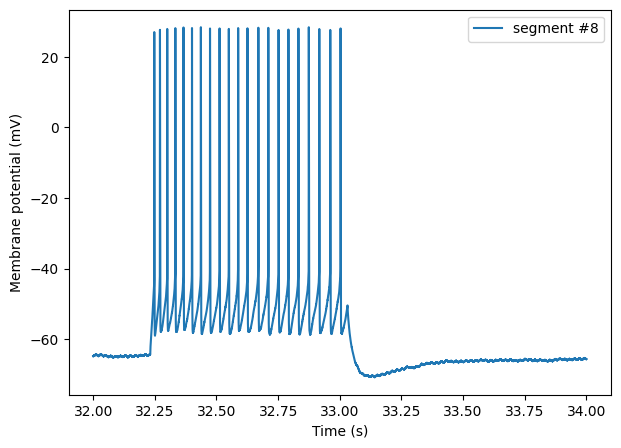

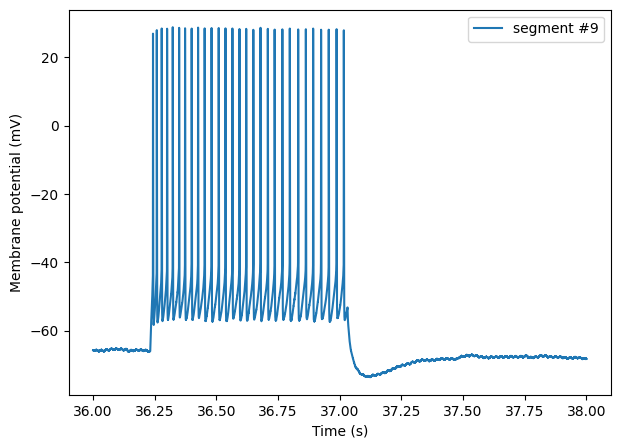

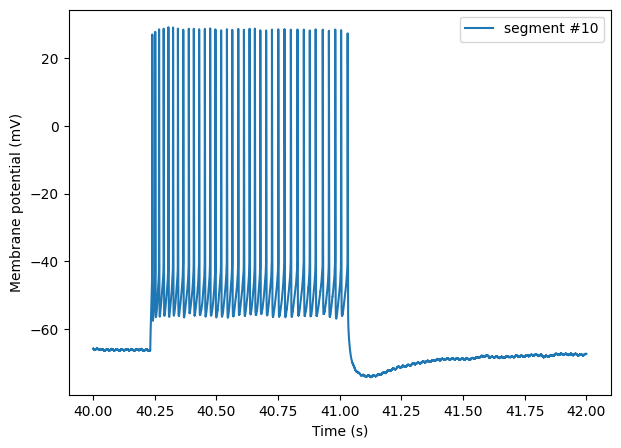

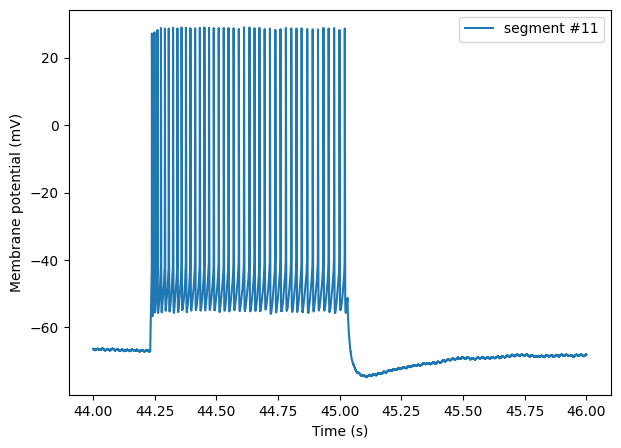

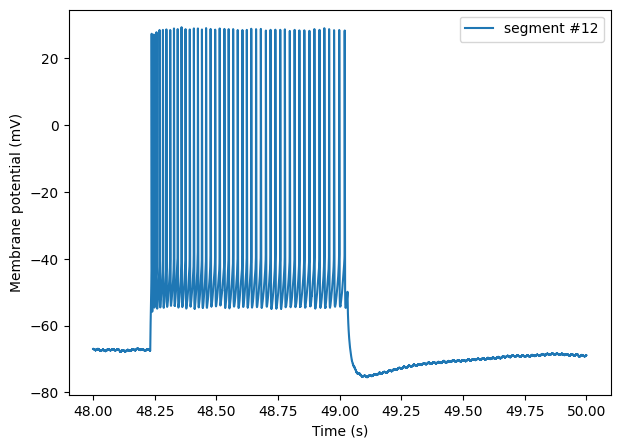

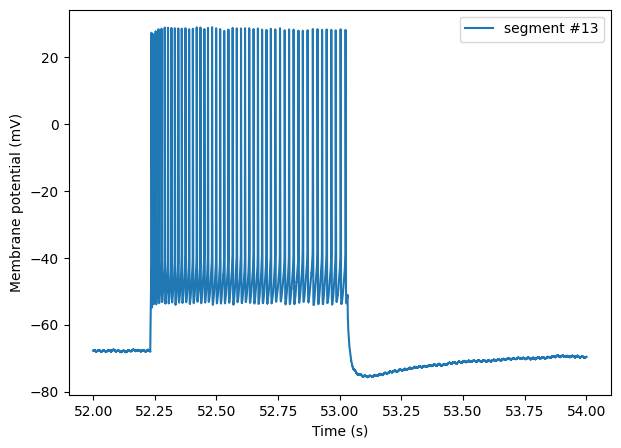

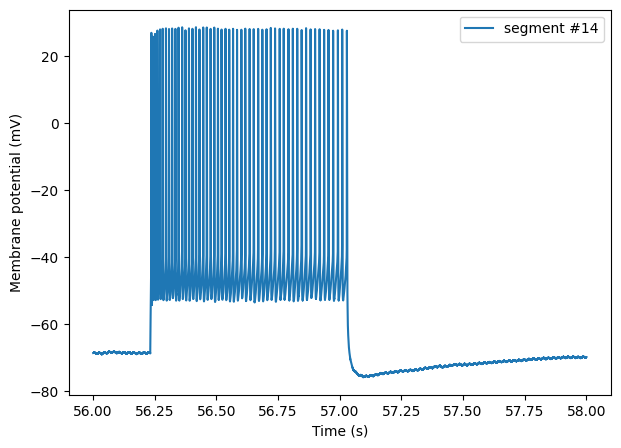

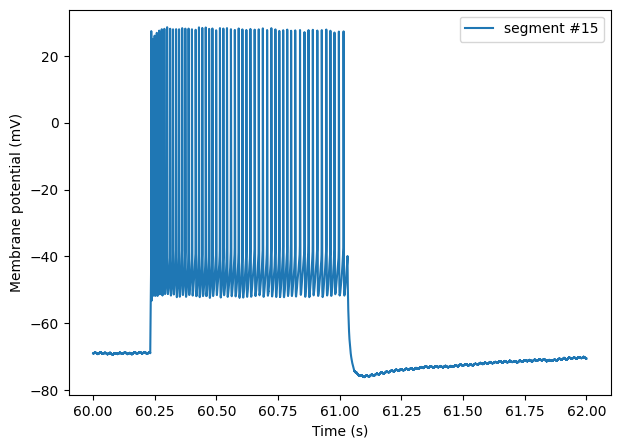

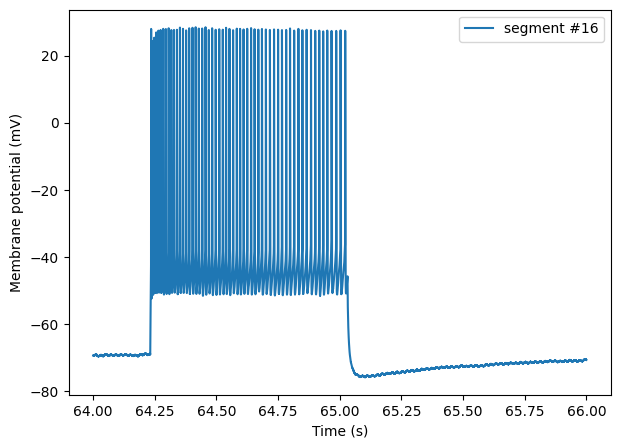

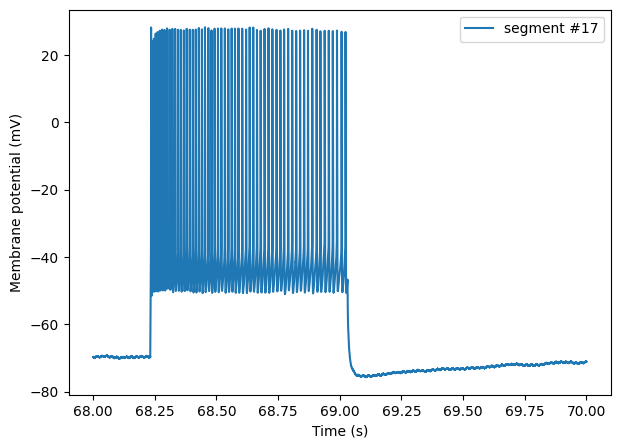

In [8]:
#visualisation of the data, 
n=0
while n<18:
    plt.rcParams["figure.figsize"] = (7, 5)
    file_path = ("hbp-d000040_PyramidalCellProperties_pub/L2-3/2017_03_08_s3c2_0000.abf")
    reader = get_io(file_path)
    data = reader.read(lazy=True)
    reader = get_io(file_path)
    data = reader.read(lazy=True)
    seg0 = data[0].segments[(n)]
    channel0 = seg0.analogsignals[0]
    channel0 = channel0.load()
    channel0.array_annotations = {} 
    plt.plot(channel0.times, channel0, label=f"segment #{n}")
    plt.xlabel(f"Time ({channel0.times.units.dimensionality.string})")
    plt.ylabel(f"Membrane potential({channel0.units.dimensionality.string})")
    plt.legend()
    plt.title("")
    plt.show()
    n=n+1

In [8]:
34/909


0.0374037403740374